# [해설지] Tip 데이터 분석하기

### Tip 데이터셋에서 가장 높은 Tip을 받기 위한 전략 짜기

### 학습 목표
- 각 테이블 별로 전체 금액, 팁 금액, 성별 등의 정보가 담겨있는 Tip 데이터셋을 자세히 살펴본다.
- 데이터를 pandas, numpy, matplotlib 등의 패키지로 다루는 데에 익숙해진다.
- 각 Column별로 Tip이 높아지는 경향성을 찾아보며 어떤 특징의 테이블에 언제 가야 더 많이 받을 수 있는지 분석해본다.

---

## Contents

#### 1. [데이터 분석 준비하기](#1.-데이터-분석-준비하기)

#### 2. [데이터셋 뜯어보기](#2.-데이터셋-뜯어보기)

#### 3. [가설을 세우고 그에 따라 세부 분석해보기]()
- 가설 첫 번째 : 테이블의 인원수를 나타내는 `size` 컬럼은 tip을 결정짓는 중요한 요소일 것이다

---

# 1. 데이터 분석 준비하기

### Import Modules

데이터 분석에 필요한 module을 import 해 봅니다.    
지금까지 배웠던 numpy, pandas, matplotlib과 함께 또다른 시각화 툴인 seaborn 까지 사용해 보겠습니다.

In [1]:
# numpy
import numpy as np

# pandas
import pandas as pd

# seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset

이번 데이터셋은 데이터 시각화 패키지인 `seaborn` 패키지 안에 포함되어 있습니다.     

- `seaborn` 모듈 복습하기   
    seaborn은 matplotlib과 비슷하게 데이터에 대한 시각화를 제공하는 패키지로 간단하고 가벼운 그래프에 최적화 되어있는 matplotlib과 달리, 시각화 자체의 기능을 더 살려서 예쁘고 다양한 형태의 그래프를 그릴 수 있도록 만들어진 패키지입니다.

- seaborn 공식 홈페이지 : http://seaborn.pydata.org/


seaborn은 간단한 데이터셋으로 여러 실험을 해볼 수 있도록 샘플 데이터셋을 제공합니다.    
제공되는 데이터셋은 다음 함수로 확인할 수 있습니다.

In [2]:
# 빨간 warning message를 보고싶지 않다면
import warnings
warnings.filterwarnings('ignore')

In [3]:
# seaborn 데이터 살펴보기
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'df_tip',
 'titanic']

비행 데이터를 담은 `flights`, 붓꽃 데이터를 담은 `iris` 등 여러가지 데이터가 있네요.    
이 중 우리가 오늘 사용해 볼 데이터셋은 Tip 데이터입니다. `sns.load_dataset("df_tip")` 으로 데이터셋을 가져와 보겠습니다.   

다른 데이터들이 어떤 데이터인지 궁금하다면 직접 사용해보는 것을 추천합니다!

참고로, 저희는 데이터셋을 가져와서 원본은 따로 저장을 해두고, 복사한 데이터셋을 사용합니다.
꼭 이렇게 해야만 하는 것은 아니지만, 데이터를 다루다보면 데이터셋을 종종 바꾸는 일이 있기 때문에 원본 데이터셋은 따로 저장해두는 습관을 가지는 것이 좋습니다.

In [4]:
# 데이터 불러오기
# pd.read_csv('df_tip.csv')
data = sns.load_dataset("df_tip")
df_tip = data
print(df_tip.shape)
df_tip.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


총 244개의 행과 7개의 열로 이루어져 있군요.  
각 행은 해당 식당에서 식사한 각 테이블에 대한 정보를 나타냅니다. 즉, 테이블 단위로 데이터가 쌓여있다고 봐도 좋을 것 같아요.
각 데이터는 total_bill, tip, sex, smoker, day, time, size 7개의 정보를 담고 있습니다.

각 컬럼에 대한 세부 내용은 다음과 같습니다.    
- `total_bill` : 테이블의 전체 지불 금액
- `tip` : 팁으로 낸 금액
- `sex` : 웨이터의 성별
- `smoker` : 손님의 흡연 여부
- `day` : 요일
- `time`  : 시간
- `size` : 테이블 인원수

`info()` 함수를 사용하여 데이터 셋을 한 눈에 확인해보겠습니다. 

In [5]:
# 데이터 셋 정보 한 눈에 확인해보기
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


이번에도 결측치 먼저 확인해보겠습니다.

In [6]:
# 결측치 개수 확인해보기
df_tip.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

다행히 결측치는 아무것도 없군요! 그렇다면 바로 진행해보도록 하겠습니다.

### `tip_rate` 컬럼 추가
흠, 우리는 어떤 테이블이 Tip을 많이 주는지를 본다고 했죠. 그렇다면 어떤 데이터가 또 있으면 좋을까요?
우리나라에서는 tip을 주는 문화가 없지만, 서양 국가에서는 tip을 주는 것이 매우 자연스러운 문화입니다. Tip의 금액은 보통 전체 금액의 10%~20%를 주는 것이 적당한 수준으로 문화가 자리잡고 있습니다. 물론 전체 금액의 일정 비율로 주는 것이 아니라, 내가 원하는 만큼의 금액을 주기도 합니다.

이렇듯 팁을 전체 금액에 대해 몇 %를 지불하였는지에 대한 여부는 팁의 총 금액에도 큰 영향을 미치는 요소이니, 팁을 몇 퍼센트나 줬는지 확인해보면 좋을 것 같습니다.

그럼 `tip`을 `total_bill`로 나눈 `tip_rate` 컬럼을 새로 만들어보겠습니다.

In [7]:
# 팁 비율 컬럼 추가하기
df_tip["tip_rate"] = round(df_tip["tip"] / df_tip["total_bill"] *100, 2)
df_tip.head() 

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


`round()` 반올림 함수를 이용해서 깔끔하게 나타나졌네요.

---

# 2. 데이터셋 뜯어보기
본격적으로 데이터셋을 하나하나 뜯어보도록 합니다. 데이터를 완벽하게 이해해야 원하는 결론도 낼 수 있다는 점을 잊지 마세요!

### (1) `sex` : 웨이터의 성별

성별은 어떤 데이터로 이루어져 있고, 각 데이터는 몇 개씩 있을까요?    



먼저 pandas의 `groupby` 함수를 이용해서 확인해보겠습니다. 

`groupby` 함수는 `dataset.groupby("column")` 의 형태로 사용하며, 그 뒤에 원하는 통계량을 붙여주어야 값을 확인할 수 있습니다.
우리는 값의 개수를 확인할 것이므로, `size()`를 사용해보겠습니다.

In [8]:
# 웨이터의 성별 값 확인하기
df_tip.groupby('sex').size()

sex
Male      157
Female     87
dtype: int64

위 결과는 **Series**의 데이터 자료형으로 표현된 것입니다.
Series 자료형이란, pandas에서 컬럼이 단 한 개인 데이터셋을 다루는 자료형입니다.
위 형태를 여러 개의 컬럼을 가진 pandas의 DataFrame으로 보고싶다면 `reset_index`를 활용해서 index를 만들어 주면 됩니다.

In [9]:
# 성별을 pandas Dataframe 형식으로 보기
sex_count = df_tip.groupby('sex').size().reset_index(name = "counts")
sex_count

,sex,counts
0,Male,157
1,Female,87


새로운 컬럼의 이름을 우리가 보고싶었던 데이터인 "counts"로 설정하니 깔끔하게 확인이 되었네요!

다음은 그래프로도 확인해 보겠습니다.     
앞서 소개했던 matplotlib의 상위 버전인 seaborn을 사용하도록 하죠.
다만, seaborn도 matplotlib을 기반으로 만들어진 패키지이기 때문에 plt 함수를 활용해서 더 많은 동작을 실행할 수 있습니다.

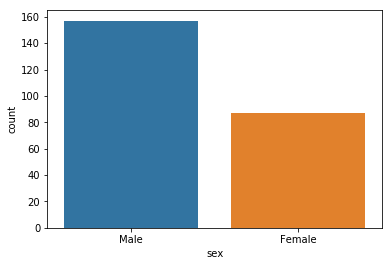

In [10]:
# 그래프로 성별 확인해보기
sns.countplot(data = df_tip, x= "sex")
plt.show()

네, 그래프로 보니 이 데이터셋에는 남자 웨이터가 더 많은 것이 확실히 보이는군요. 약 2:1의 성비를 담고 있는 것으로 보입니다.

정확한 비율이 궁금하다면 다음과 같이 계산해볼 수 있죠!

In [11]:
print("Male   ", "{:.1f}%".format(sex_count.loc[0, "counts"] / len(df_tip) * 100))
print("Female ", "{:.1f}%".format(sex_count.loc[1, "counts"] / len(df_tip) * 100))

Male    64.3%
Female  35.7%


### (2) `smoker` : 손님의 흡연 여부

smoker의 데이터 개수는 이제 간단하게 확인할 수 있겠습니다.

In [12]:
# groupby 를 활용해 흡연 여부 데이터 프레임 형식으로 보기
df_tip.groupby('smoker').size().reset_index(name = "counts")

,smoker,counts
0,Yes,93
1,No,151


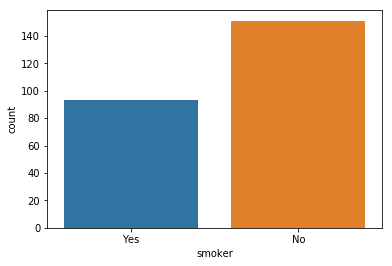

In [13]:
# 데이터 시각화해보기 
sns.countplot(data = df_tip, x = 'smoker')
plt.show()

흡연자보다는, 비흡연자가 많네요!

### (3) `day`, `time` : 요일, 시간

이번에는 day와 time 별로 데이터 상황을 살펴보겠습니다.    


여러 값이 있는 데이터를 살펴보는 것은 `pivot_table`를 활용하면 간단합니다.     
`pivot_table`에서 데이터의 개수를 세기 위해 `counts`라는 컬럼을 만들어주겠습니다. 

In [14]:
# counts 컬럼에 동일하게 1 값을 넣어주기
df_tip["counts"] = 1
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,1
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,1
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,1
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,1
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,1


이제 `pivot_table`을 counts에 대한 sum(총합)을 이용하면 간단하게 각 시간/요일 별 데이터 수를 확인할 수 있겠죠!     

In [15]:
# index 는 time 으로, columns 는 day 로 설정하여 피봇 테이블 만들기 
df_tip.pivot_table("counts", index = "time", columns = "day", aggfunc = 'sum')

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61.0,7.0,NaN,NaN
Dinner,1.0,12.0,87.0,76.0


빈 값으로 나타난 것은 데이터가 없기 때문입니다. 0으로 채워주고, 데이터 또한 정수형으로 바꿔주도록 하겠습니다.  

특히, 피벗테이블의 마지막에 총합 행과 열을 추가해주고싶으면 `margins=True` 값을 넣어주면 됩니다.

In [16]:
# 빈 값은 0으로 채워주고 정수형으로 형 변환해주기
df_tip.pivot_table("counts", index = "time", columns = "day", aggfunc = 'sum', margins = True).fillna(0).astype('int64')

day,Thur,Fri,Sat,Sun,All
time,,,,,
Lunch,61,7,0,0,68
Dinner,1,12,87,76,176
All,62,19,87,76,244


앗, day에는 **목, 금, 토, 일** 데이터만 있는 것 같아 보입니다. 또한, 토요일과 일요일은 점심 장사를 안하는 것 같군요!

특히, 요일별 데이터에서는 금요일 데이터가 가장 적은게 눈에 띕니다. 간단히 확인을 해보면,

In [17]:
# 비율 확인하기
(19 / 244) * 100

7.786885245901639

약 7.8%밖에 안되는 데이터만 존재하는군요.

그래프로도 확인을 해보죠. 

그래프로도 확인을 해보죠. time별로 확인하고 싶다면 hue라는 파라미터에 "time"을 입력해주면 됩니다.

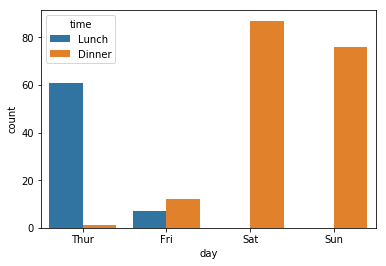

In [18]:
# 그래프로 시각화해보기
sns.countplot(data = df_tip, x = "day", hue = "time")
plt.show()

지금까지 알아본 것을 정리하면 다음과 같습니다.

- **요일day**
목, 금, 토, 일의 데이터만 존재하며, 특히 금요일은 전체 데이터의 약 7.8%의 매우 적은 데이터만 있다.
또한, 요일의 종류로 본다면 평일이 목/금 이틀, 주말이 토/일 이틀로 구분할 수 있다.

- **시간time**
런치와 디너 두 가지의 데이터를 가진다.
그러나 런치는 목, 금요일에만 데이터가 있고, 토, 일 즉 주말에는 런치에 대한 데이터가 없고, 평일 디너의 데이터 개수는 매우 적다.
따라서 시간으로 데이터를 분석할 때, **런치는 모두 평일 데이터이며, 디너는 주로 주말의 데이터**라는 점을 고려해야 한다.

### (4) `size` : 테이블 인원수

size는 테이블 인원수를 나타냅니다.   

테이블 인원 수에 따른 Tip 과 Total Bill 값을 시각화를 통해 확인해보도록 하겠습니다.

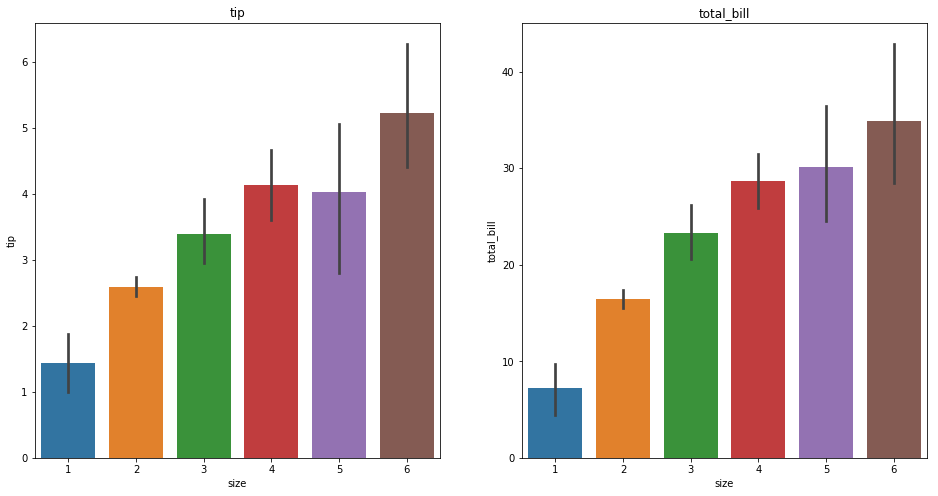

In [19]:
# subplot 사용하여 1개 행, 2개 열로 두개의 컬럼 동시에 시각화하기 
plt.figure(figsize=(16,8))

plt.subplot(121)
sns.barplot(data = df_tip, x = "size", y = "tip")
plt.title('tip')

plt.subplot(122)
sns.barplot(data = df_tip, x = "size", y = "total_bill")
plt.title('total_bill')

plt.show()

역시 예상대로 size가 커질수록 tip과 total_bill이 증가하는 경향을 보이는군요.
Tip을 결정짓는 가장 중요한 요인 중 하나는 size가 될 것 같습니다.

잠깐! 여기서 그래프의 색상을 바꿀 수 있는 방법을 소개합니다.    
    
seaborn은 다양한 color palette를 제공하므로, 원하는 것을 골라서 사용할 수 있습니다. 
- https://seaborn.pydata.org/generated/seaborn.color_palette.html    


여기에서 다양한 컬러 팔레트를 확인하고, 원하는 팔레트를 골라서 사용하세요!

In [20]:
sns.set_palette("Set2")
# sns.set_palette("Paired")
#sns.set_palette("husl")

pallete를 `husl`로 설정하면 그래프가 어떻게 바뀔까요?

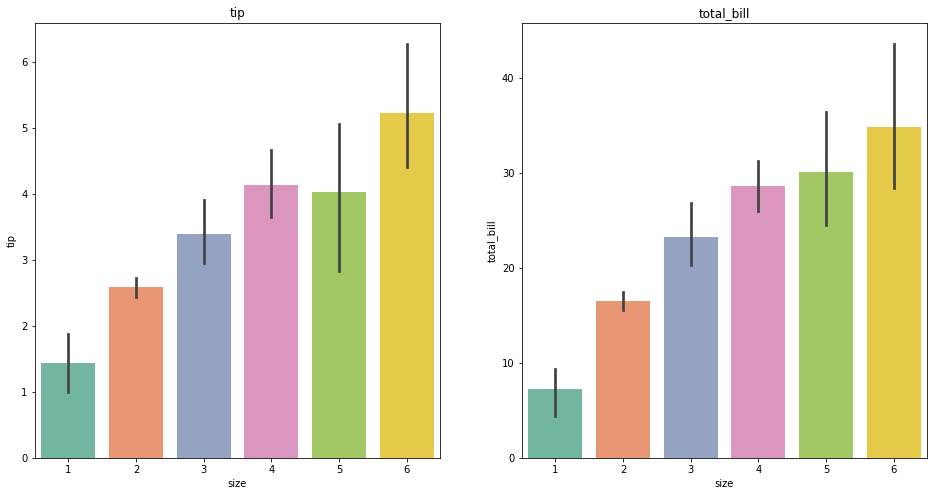

In [21]:
# 그래프 색상 바꿔서 다시 출력해보기 
plt.figure(figsize=(16,8))

plt.subplot(121)
sns.barplot(data = df_tip, x = "size", y = "tip")
plt.title('tip')

plt.subplot(122)
sns.barplot(data = df_tip, x = "size", y = "total_bill")
plt.title('total_bill')

plt.show()

#### size별 데이터 개수는 어떨까?

size별 데이터는 몇 개씩 있을까요? 확인해봅시다.

In [22]:
# 테이블 인원수 데이터 개수 확인해보기
df_tip.groupby('size').size().reset_index(name = "counts")

,size,counts
0,1,4
1,2,156
2,3,38
3,4,37
4,5,5
5,6,4


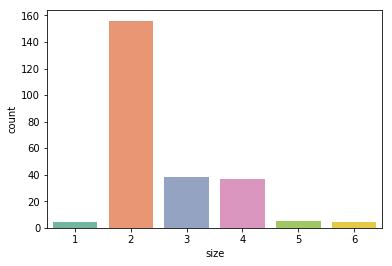

In [23]:
# 확인한 데이터 개수 시각화해보기
sns.countplot(data = df_tip, x="size")
plt.show()

1인~6인 테이블이 존재하지만, 2인 테이블이 가장 많은 것을 확인할 수 있습니다.
혼자 먹는 1인 테이블과 5인 이상의 테이블은 아주 희귀하군요. 5-6인 테이블은 팁을 많이 받겠지만, 많은 기회가 있진 않을 것이라 예상할 수 있습니다.    

---

# 3. 가설을 세우고 그에 따라 세부 분석해보기

지금까지 데이터를 어느정도 살펴보았으니, 이제 원하는 목표를 위해 가설을 세운 후 세부적으로 분석을 해보겠습니다.     

데이터 분석에서 가장 중요한 것은 가설을 세우고 이를 검증하는 것이라고 할 수 있습니다.
그래서 데이터를 들여다 볼 때도 어떤 컬럼이 Target 컬럼과 어떤 연관이 있을지에 대해 고민해보는 것이 매우 중요하죠.

## 가설 : 테이블의 인원수를 나타내는 `size` 컬럼은 tip을 결정짓는 중요한 요소일 것이다

앞서 데이터를 살펴보면서 `size`가 `total_bill`과 `df_tip`를 결정짓는 중요한 요소임을 확인하였습니다.     
그렇다면 실제로 그런지 조금 더 구체적으로 살펴보죠!

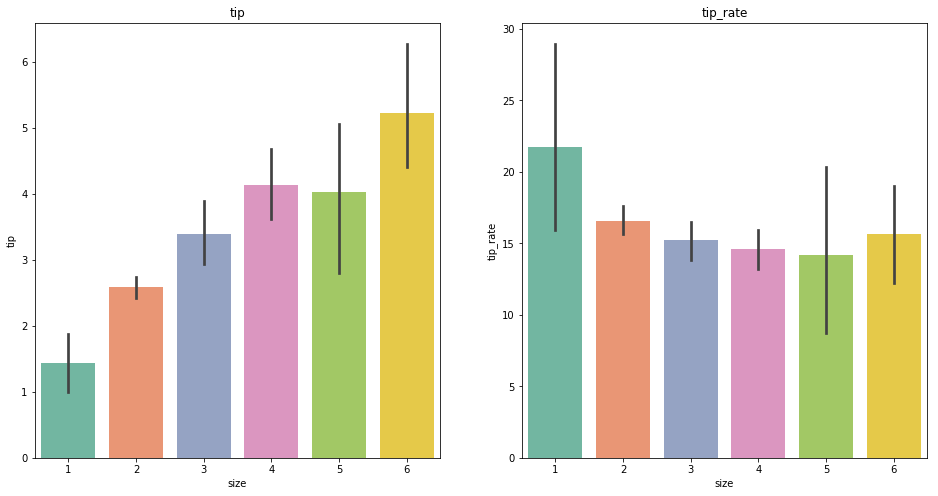

In [24]:
# size 에 따른 tip, tip_rate 그래프 시각화하기
plt.figure(figsize=(16,8))

plt.subplot(121)
sns.barplot(data = df_tip, x = "size", y = "tip")
plt.title('tip')

plt.subplot(122)
sns.barplot(data = df_tip, x = "size", y = "tip_rate")
plt.title('tip_rate')

plt.show()

흠, 하지만 tip_rate를 살펴보았을 때는 size가 커질수록 팁을 주는 비율은 낮아지는 것이 확인됩니다.   

혼자 온 손님의 경우 20% 이상의 팁을 많이 주는 반면, 5-6인 테이블에서는 약 15% 내외로만 주는군요.

비용이 높아질수록 tip의 절대적인 금액도 높아지므로 비율은 낮춰서 주는 것으로 파악됩니다.

#### 그렇다면 `total_bill`과 `tip_rate`의 관계는 어떨까?

`total_bill`과 `tip_rate`의 관계를 확인할 수 있는 그래프도 한 번 확인해보겠습니다.    

두 가지 데이터의 분포를 확인하고 싶은 경우, 점을 찍을 수 있는 산점도로 확인하면 편리합니다.
seaborn은 간단한 추세선을 `fit_reg`로 확인할 수 있습니다. 추세선은 기본적으로 다항식으로 표현되는데, `order` 인자로 차수를 결정할 수 있습니다.

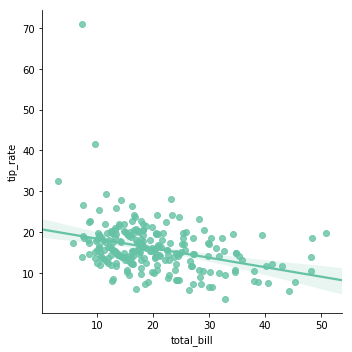

In [25]:
# order=1 인 경우: 1차 함수
sns.lmplot(data=df_tip, x="total_bill", y="tip_rate", fit_reg=True, order=1)
plt.show()

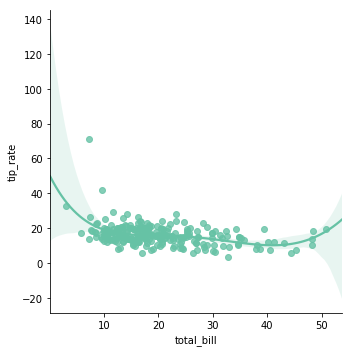

In [26]:
# order=2 인 경우: 2차 함수
sns.lmplot(data=df_tip, x="total_bill", y="tip_rate", fit_reg=True, order=5)
plt.show()

어떤가요? 같은 그래프이지만 추세선은 다르게 나타납니다.  

당연한 이야기지만 차수가 낮다면 비교적 단순한 경향성을 알아볼 수 있고, 차수가 높다면 데이터에 보다 적합하면서도 복잡한 추세를 알아볼 수 있습니다.   
그렇다면 복잡하고 정교하게 추세를 볼수록 항상 좋은걸까요? 한 번 생각해봅시다.

음, 차수를 너무 높게 잡아서 복잡한 추세를 보게되면, 그 주어진 데이터에만 맞는 아주 복잡한 선이 그려질 수 있습니다.   

이 말은, 일반화하기에는 어렵다는 뜻이고, 그 결과 주어진 데이터가 아닌 새로운 데이터에 대해서는 맞지 않을수도 있다는 이야기가 되죠.
이 문제를 머신러닝에서는 과적합(overfitting) 이라고 합니다. 

#### 이상치(Outlier)를 살펴보자

위 그래프를 통해 `total_bill`과 `tip_rate`는 반비례하는 경향을 가지는 것을 확인할 수 있습니다.    

또 한 가지 흥미로운 점은, 혼자서 엄청 떨어져 있는 특이한 tip_rate(70%이상, 40%이상) 가 있다는 점입니다. 
이를 시각화를 통해 확인해보겠습니다.

이는 **이상치(Outlier)**로, 데이터를 다룰 때 혼자 너무 떨어져 있는 데이터의 경우 전체적인 경향성을 확인하는 데에 부정적인 영향을 줄 수 있으므로 주의해야 합니다.

아웃라이어를 확실히 확인하고 싶을 때에는 boxplot을 활용하면 편리합니다.

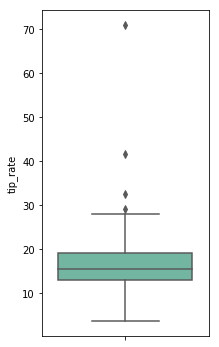

In [27]:
# 시각화로 이상치 확인해보기
plt.figure(figsize=(3,6))

sns.boxplot(data = df_tip, y = "tip_rate")
plt.show()

박스플롯을 그리면 데이터의 분포가 나타납니다.     

박스플롯에 대한 세부 특징은 다음과 같습니다.

- 박스 내에 있는 선은 **중앙값**, 박스의 윗변은 **상위 25%값**, 아랫변은 **상위 75%값**을 나타내며, 각각의 포인트를 통계에서는 **Q1(1사분위수), Q3(3사분위수)**라고 부릅니다.
- Q1 - Q3 값을 `IQL (Inter Qualtile Range, 사분범위)`라고 하며, 박스의 윗꼬리는 Q1- 1.5 * IQR, 박스의 아랫꼬리는 Q3 + 1.5 * IQR 위치입니다.
- 특히, 박스의 아랫꼬리부터 윗꼬리 사이 범위를 벗어나는 데이터를 **이상치**라고 부르는데, 박스플롯에서는 따로 점을 찍어서 나타냅니다.


이상치를 어떻게 처리하느냐는 상황에 따라, 도메인에 따라 달라질 수 있습니다. 박스플롯에 나타나는 모든 데이터포인트를 삭제할수도, 일부분을 삭제할수도 있습니다. 저희는 이상치 중에서도 혼자 가장 멀리 떨어져있는 70% 이상의 데이터포인트를 확인해보겠습니다.

In [28]:
# 70% 이상의 팁 비율(이상치) 확인하기
df_tip[df_tip["tip_rate"]>=70]

,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03,1


2명의 손님이 일요일 저녁에 간단한 저녁을 간단히 먹고 팁을 꽤 많이 지불했나보군요.
저희는 현재 데이터셋 자체가 크지 않은 상황이기에 이상치들을 모두 지우는 것은 적합하지 않을 수 있습니다.

가장 멀리 떨어져있는 위 행만 삭제를 하고 진행해보도록 하겠습니다. 

 
index를 확인했으니, pandas의 `drop` 함수로 간단히 제거할 수 있습니다

In [29]:
# drop 함수로 이상치 제거하기
df_tip = df_tip.drop(172)
print(df_tip.shape)

(243, 9)


1개의 행이 없어진 243개의 데이터셋이 되었습니다.

이제  다시 분포를 확인해봅시다. 

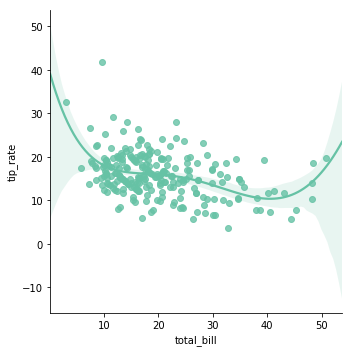

In [30]:
# 이상치 제거 이후 분포 다시 확인해보기 
sns.lmplot(data=df_tip, x="total_bill", y="tip_rate", fit_reg=True, order=5)

이제 전체적으로 혼자 엄청 떨어진 데이터 없이 정상적인 데이터 분포를 확인할 수 있고, 반비례 관계를 가지는 것을 확인했습니다.

#### 그렇다면, `tip_rate`가 작은  큰 테이블이 좋은가, 아니면 `tip_rate`가 큰 작은 테이블이 좋은가?
이런 질문을 던져보지 않을 수 없겠죠! 바로 확인해봅시다.

먼저 우리가 원하는 컬럼인 `size`를 기준으로 `groupby`를 한 후, `describe` 함수를 이용해서 간단한 통계량을 한 번에 확인해보겠습니다.    
`describe`는 전체 데이터에 대한 통계량을 한 번에 볼 때 유용합니다.     

describe에서는 "tip" 데이터만 빼서 확인해보죠!

In [31]:
# describe 함수로 통계량 확인해보기
df_tip.groupby('size').describe()["tip"]

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1,4.0,1.437500,0.506516,1.00,1.0000,1.415,1.8525,1.92
2,155.0,2.565742,0.966660,1.00,2.0000,2.500,3.1250,5.85
3,38.0,3.393158,1.557344,1.36,2.3575,3.290,3.6825,10.00
4,37.0,4.135405,1.640668,2.00,3.0000,3.760,5.0700,9.00
5,5.0,4.028000,1.440111,2.00,3.0000,5.000,5.0000,5.14
6,4.0,5.225000,1.053170,4.20,4.8000,5.000,5.4250,6.70


여기서 우리가 주의해야 할 값은 1명 테이블의 팁의 최대값과 6명 테이블 팁의 최소값입니다.

- 1명 테이블 팁 최대값 : 1.92
- 6명 테이블 팁 최소값 : 4.2

즉, tip_rate가 작다고 해도 total_bill이 크기 때문에 tip값은 절대적으로 클 수밖에 없는거죠.

따라서 이런 결론을 내릴 수 있습니다.
> **size가 큰 테이블은 작은 테이블보다 `tip_rate`가 작더라도 `tip` 금액은 클 것이다** 

### [가설] size는 tip을 결정짓는 가장 중요한 요소이다 : 결론

  
`tip_rate`가 높더라도 `size`가 작다면 총 금액이 작아서, 비율로 환산할 시 실제로 받는 절대적인 tip 금액은 작다.   
그러므로, 일단은 **1순위로 size가 큰 테이블을 잡는 것이 유리하다.**

### 결론을 낸 후의 고찰

하지만, size를 다시 한 번 상기해보면 어떤가요?

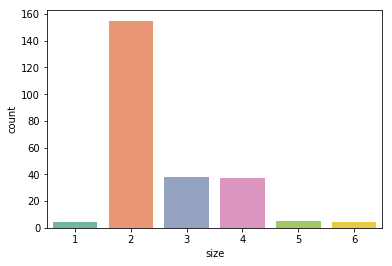

In [32]:
# size 다시 한번 시각화해보기
sns.countplot(data=df_tip, x = "size")
plt.show()

실제로 size는 2명인 테이블이 154개로 가장 압도적이고, 1명이거나 5명, 6명인 테이블은 각각 전체의 5%도 안되는 개수를 가집니다.    

따라서 큰 테이블을 잡는 것은 좋으나, 그 빈도는 높지 않을 것으로 예상됩니다.

---